<a href="https://colab.research.google.com/github/jsong55/Machine_Learning/blob/master/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with NN in TF

In [ ]:
# Import TF
import tensorflow as tf
print(tf.__version__)

2.8.0


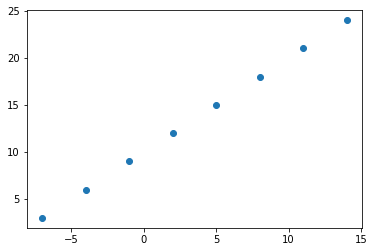

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7,-4,-1,2,5,8,11,14])

# create labels
Y = np.array([3,6,9,12,15,18,21,24])

# visualize
plt.scatter(X,Y)

In [ ]:
Y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### input and output shapes

In [ ]:
# create a demo tensor
houtse_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
houtse_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
# turn arrays into tensors
X = tf.constant(X)
Y = tf.constant(Y)
X,Y

(<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>)

## Steps in modelling with TF

1. create a model - define input & output layers, hidden layers
2. compiling a model - define the loss function, optimizer, evaluation metrics
3. Fitting a model

In [ ]:
# set ramdon seed
tf.random.set_seed(42)

# 1. create a model using sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                            
])

#2 compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# fit the model
model.fit(tf.expand_dims(X,axis = -1),Y,epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 738ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 17ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 17ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 20ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# try to make a prediction
model.predict([17.0])

array([[12.716021]], dtype=float32)

$$ Improving our model
1. **Creating a model** - add more layers,
increase the number ofg hidden units or neurons, 
change the activation function
2. **compiling a model** - change the optimization function
or "LR"
3. **Fitting a model** - more epochs or more data

In [ ]:
# rebuild the model

# 1. create a model using sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                            
])

#2 compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# fit the model (train for longer)
model.fit(tf.expand_dims(X,axis = -1),Y,epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 741ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 38ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 31ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 26ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 30ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================

In [ ]:
model.predict([17])

array([[29.739855]], dtype=float32)

In [ ]:
# another model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50,activation = "relu"),
  tf.keras.layers.Dense(1)                            
])

model.compile(loss=tf.keras.losses.MAE,
       optimizer=tf.keras.optimizers.Adam(lr = 0.1),
       metrics = ["mae"]
)
model.fit(tf.expand_dims(X,axis = -1),Y,epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 1s/step - loss: 12.1311 - mae: 12.1311
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 7.4378 - mae: 7.4378
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 4.0332 - mae: 4.0332
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 6.1711 - mae: 6.1711
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 5.2231 - mae: 5.2231
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 3.6593 - mae: 3.6593
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 3.4330 - mae: 3.4330
Epoch 8/100
1/1 [==============================] - 0s 43ms/step - loss: 3.0846 - mae: 3.0846
Epoch 9/100
1/1 [==============================] - 0s 31ms/step - loss: 3.1236 - mae: 3.1236
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 3.0096 - mae: 3.0096
Epoch 11/100
1/1 [==============================] - 0s 13ms/step - loss: 2.3455 -

In [ ]:
model.predict([17])

array([[26.383595]], dtype=float32)

### Evaluating a model (visualize)
* the data
* the model it self
* the t raining of a model
* prediction of the model

In [ ]:
# make a larger dataset
X = tf.range(-100,100,4)
Y = X+10
X, Y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

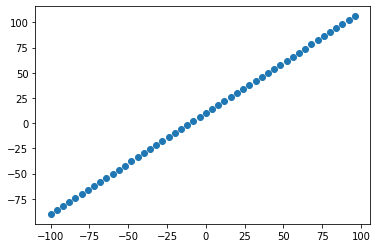

In [ ]:
# visualize the plot
plt.scatter(X,Y)

### the 3 sets:
* training set : 70-80% of the total data
* validation set : 10-15%
* test set : 10-15%

In [ ]:
# split the data into training and testing
X_train = X[:40]
X_test = X[40:]

Y_train = Y[:40]
Y_test = Y[40:]

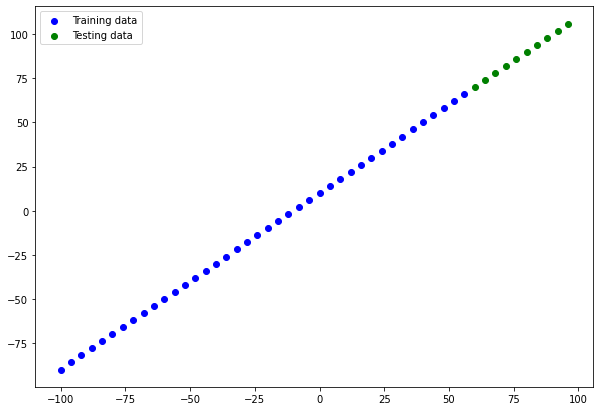

In [ ]:
plt.figure(figsize = (10,7))
# plot training data in blue
plt.scatter(X_train,Y_train,c="b",label = "Training data")
# plot test data in green
plt.scatter(X_test,Y_test,c="g",label = "Testing data")
plt.legend();

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.1),
              metrics = ["mae"])

model.fit(tf.expand_dims(X_train,axis = -1),Y_train,epochs = 100)


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 1s 12ms/step - loss: 10.6436 - mae: 10.6436
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 7.7546 - mae: 7.7546
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 8.4358 - mae: 8.4358
Epoch 4/100
2/2 [==============================] - 0s 30ms/step - loss: 7.2972 - mae: 7.2972
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 7.9495 - mae: 7.9495
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 8.4349 - mae: 8.4349
Epoch 7/100
2/2 [==============================] - 0s 20ms/step - loss: 7.6397 - mae: 7.6397
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 7.0277 - mae: 7.0277
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 6.9798 - mae: 6.9798
Epoch 10/100
2/2 [==============================] - 0s 18ms/step - loss: 6.2327 - mae: 6.2327
Epoch 11/100
2/2 [==============================] - 0s 10ms/step - loss: 7.1470 -

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
                             tf.keras.layers.Dense(1,name="output_layer")
], name = "model_1")
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
              metrics = 'mse')

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(tf.expand_dims(X_train,axis = -1),Y_train,epochs = 50,verbose = 2)

Epoch 1/50
2/2 - 1s - loss: 23.1334 - mse: 738.4313 - 1s/epoch - 565ms/step
Epoch 2/50
2/2 - 0s - loss: 13.8879 - mse: 276.7433 - 13ms/epoch - 7ms/step
Epoch 3/50
2/2 - 0s - loss: 11.2354 - mse: 175.0522 - 17ms/epoch - 8ms/step
Epoch 4/50
2/2 - 0s - loss: 9.9052 - mse: 131.8277 - 19ms/epoch - 10ms/step
Epoch 5/50
2/2 - 0s - loss: 11.6202 - mse: 184.0492 - 14ms/epoch - 7ms/step
Epoch 6/50
2/2 - 0s - loss: 13.3254 - mse: 263.9885 - 18ms/epoch - 9ms/step
Epoch 7/50
2/2 - 0s - loss: 6.4085 - mse: 51.4343 - 14ms/epoch - 7ms/step
Epoch 8/50
2/2 - 0s - loss: 12.4448 - mse: 208.3473 - 15ms/epoch - 8ms/step
Epoch 9/50
2/2 - 0s - loss: 8.3798 - mse: 97.6554 - 15ms/epoch - 8ms/step
Epoch 10/50
2/2 - 0s - loss: 7.1615 - mse: 67.4601 - 15ms/epoch - 8ms/step
Epoch 11/50
2/2 - 0s - loss: 11.3141 - mse: 190.2078 - 21ms/epoch - 10ms/step
Epoch 12/50
2/2 - 0s - loss: 5.8087 - mse: 46.2005 - 28ms/epoch - 14ms/step
Epoch 13/50
2/2 - 0s - loss: 7.3715 - mse: 74.7401 - 25ms/epoch - 12ms/step
Epoch 14/50
2/2

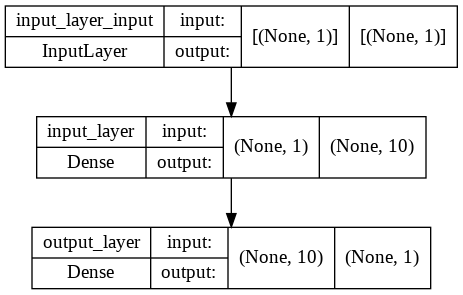

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes = True)

### Visualizing model's predictions
good idea to plot them against the ground truth

In [ ]:
# make some predictions
Y_pred = model.predict(X_test)
Y_pred, Y_test

(array([[ 66.59317 ],
        [ 70.380844],
        [ 74.16852 ],
        [ 77.95619 ],
        [ 81.743866],
        [ 85.531555],
        [ 89.31922 ],
        [ 93.1069  ],
        [ 96.89458 ],
        [100.68224 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
# create a function
def plot_predictions(train_data = X_train,
                     train_labels = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions = Y_pred):
    plt.figure(figsize = (10,7))
    plt.scatter(train_data,train_labels,c="b",label="Training data")
    plt.scatter(test_data,test_labels,c="g",label="Testing data")
    plt.scatter(test_data,predictions,c="r",label="Predictions")
    plt.legend();   



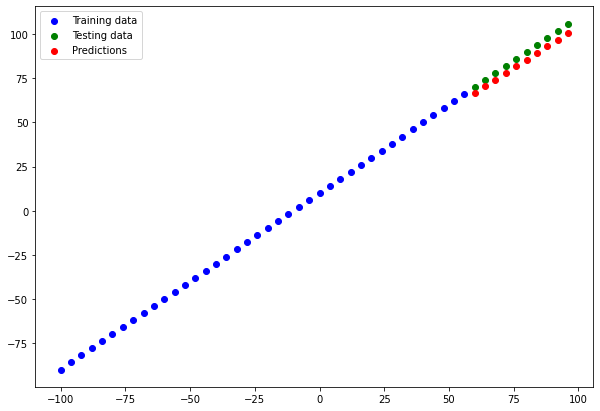

In [ ]:
plot_predictions(train_data = X_train,
                 train_labels = Y_train,
                 test_data = X_test,
                 test_labels = Y_test,
                 predictions = Y_pred)

### Evaluating model using regression models:
MAE
MSE
Huber

In [ ]:
# evaluate the model
model.evaluate(X_test,Y_test)

1/1 [==============================] - 1s 540ms/step - loss: 4.3623 - mse: 19.4015


[4.3622870445251465, 19.401470184326172]

In [ ]:
# MAE:
mae = tf.keras.losses.MAE(y_true = Y_test,y_pred = tf.squeeze(Y_pred)).numpy()
mae

4.362291

In [ ]:
mse = tf.keras.losses.MSE(y_true = Y_test,y_pred = tf.squeeze(Y_pred)).numpy()
mse

19.401505

### compare different models:
import pandas as pd
model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],\
                  ["model_2",mae_2.numpy(),mse_2.numpy()],\
                  ["model_3",mae_3.numpy(),mse_3.numpy()]]

### Save a model

In [ ]:
# save model us the Savedmodel format
model.save("test_model_1")

INFO:tensorflow:Assets written to: test_model_1/assets


In [ ]:
# save model in HDF5 format
model.save("test_model_1_HDF5_format.h5")

In [ ]:
# load a saved model
loaded_SavedModel_format = tf.keras.models.load_model("/content/test_model_1")
loaded_SavedModel_format.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loaded_h5_model = tf.keras.models.load_model("/content/test_model_1_HDF5_format.h5")
loaded_h5_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# check predictions
model_1_preds = model.predict(X_test)
loaded_h5_preds = loaded_h5_model.predict(X_test)
model_1_preds == loaded_h5_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
